In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
1. Read and analyze the data

In [14]:
df = pd.read_csv('Iris.csv')
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    148.000000
mean    75.500000       5.843333      3.054000       3.758667      1.204730
std     43.445368       0.828066      0.433594       1.764420      0.763837
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [ ]:
5. Calculate the % of missing values in a column.

In [15]:
number_of_missing_values = ((df["Petal Color"].isnull().sum())/(df["Id"].count()))*100
val = float("{:.2f}".format(number_of_missing_values))
print(f"% of missing in Petal Color : {val}")

% of missing in Petal Color : 62.67


In [ ]:
6. Remove features with missing values (&gt;20%)

In [16]:
df = df.drop(['Petal Color'], axis=1)

In [ ]:
7. If the missing values is &lt;20% ,do data imputation(mean/median)

In [17]:
print("Number of nulls in PetalWidthCm: ",df["PetalWidthCm"].isnull().sum())
df["PetalWidthCm"].fillna(df["PetalWidthCm"].median(),inplace=True)
print("Number of nulls in PetalWidthCm: ",df["PetalWidthCm"].isnull().sum())

Number of nulls in PetalWidthCm:  2
Number of nulls in PetalWidthCm:  0


In [ ]:
8. Remove the outliers.

In [18]:
z_scores = zscore(df["SepalWidthCm"])
threshold = 2
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
print("Index of outliers:", outlier_indices)
df.drop(outlier_indices, inplace=True)

Index of outliers: [14 15 32 33 60]


In [ ]:
2. Split the dataset into train and test sets.

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,:-1],df['Species'],test_size=0.3,random_state=42)

In [ ]:
3. check shape of training and test sets

In [20]:
print("Train Shape : ",X_train.shape)
print("Test Shape : ",X_test.shape)

Train Shape :  (101, 5)
Test Shape :  (44, 5)


In [ ]:
4. Perform scaling in the data using Standard Scalar

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
9. Use sklearn variancethreshold to find the constant features and display the constant features

In [22]:
selector = VarianceThreshold(threshold=0)
selector.fit(X_train)
constant_features = [column for column in X_train.columns if column not in X_train.columns[selector.get_support()]]
constant_features

[]

In [ ]:
10. Remove features with low variance

In [23]:
low_variance_features = VarianceThreshold(threshold=0.01)
train_df_reduced = low_variance_features.fit_transform(X_train)

In [ ]:
11. Remove highly correlated features

<Axes: >

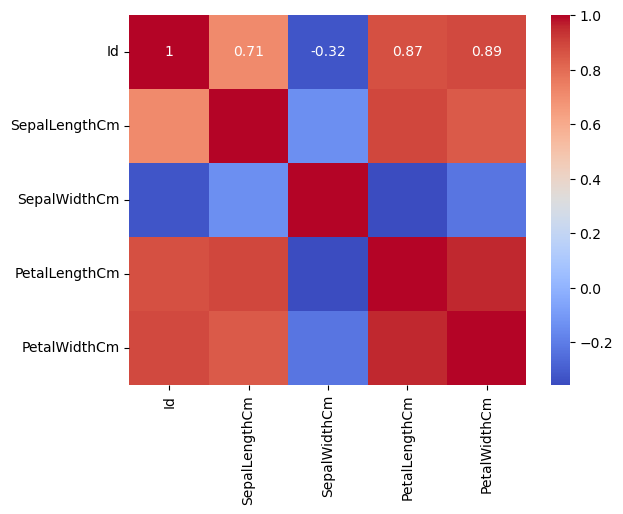

In [24]:
correlation_matrix = X_train[1:-1].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [25]:
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)
print(highly_correlated_features)
train_df_reduced.shape

{'PetalLengthCm', 'PetalWidthCm'}


(101, 5)

In [26]:
X_train.drop(['PetalWidthCm'], axis=1,inplace=True)

In [27]:
X_train_new = X_train[["SepalLengthCm","SepalWidthCm","PetalLengthCm"]]

In [ ]:
12. Perform Univariate feature selection(SelectKBest, SelectPercentile)

In [29]:
k = 2
selector = SelectKBest(k = k)
selector.fit(X_train_new, Y_train)
print(k, 'best features are:', selector.get_feature_names_out())

2 best features are: ['SepalLengthCm' 'PetalLengthCm']


In [30]:
p = 50
selector = SelectPercentile(percentile = p)
selector.fit(X_train_new,Y_train)
print('Features in top', p, 'percentile are:', selector.get_feature_names_out())

Features in top 50 percentile are: ['PetalLengthCm']


In [ ]:
13. Apply Pearson Correlation Coefficient/Spearman's rank coefficient and find Correlation-Matrix with Heatmap

Pearson correlation


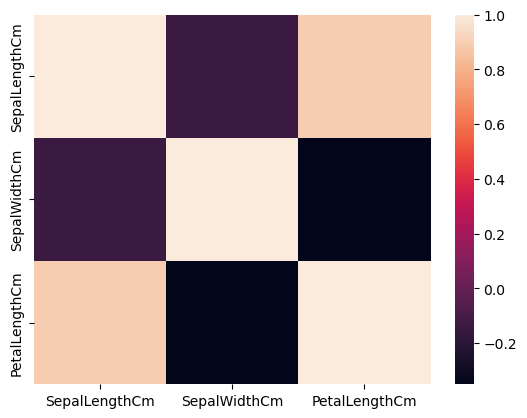

Spearman correlation


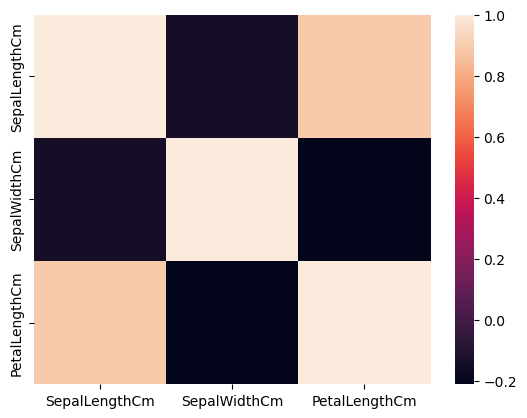

In [31]:
print('Pearson correlation')
sns.heatmap(X_train_new.corr(numeric_only=True, method = 'pearson'))
plt.show()
print('Spearman correlation')
sns.heatmap(X_train_new.corr(numeric_only=True, method = 'spearman'))
plt.show()

In [ ]:
14. Apply Principal Component Analysis(PCA) for matrix factorization

In [32]:
pca_x = X_train_new
print(pca_x.shape)
scaler = StandardScaler()
pca_x[:] = scaler.fit_transform(pca_x)
s = pca_x.cov()
eg_val, eg_vect = np.linalg.eig(s)
eg_vect = pd.DataFrame(eg_vect, columns = s.columns).set_index(s.index)
eg_vect['EigenValue'] = eg_val
top_n = 3
top_vectors = eg_vect.sort_values(by = 'EigenValue', ascending = False).head(top_n)
print('Top', top_n, 'features are:')
print(top_vectors.index)

(101, 3)
Top 3 features are:
Index(['SepalLengthCm', 'PetalLengthCm', 'SepalWidthCm'], dtype='object')


C:\Users\mehra\AppData\Local\Temp\ipykernel_2964\2059238613.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_x[:] = scaler.fit_transform(pca_x)
C:\Users\mehra\AppData\Local\Temp\ipykernel_2964\2059238613.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_x[:] = scaler.fit_transform(pca_x)


In [ ]:
15. Apply Linear Discriminant Analysis (LDA) to perform feature extraction

In [33]:
def extract_num(s):
    return int(s.strip('abcdefghijklmnopqrstuvwxyz'))
numeric_cols = ["SepalLengthCm","SepalWidthCm","PetalLengthCm"]
selector = LinearDiscriminantAnalysis()
selector.fit(X_train_new, Y_train)
col_inds = map(extract_num, selector.get_feature_names_out(numeric_cols))
print('Selected columns are:', [numeric_cols[i] for i in col_inds])

Selected columns are: ['SepalLengthCm', 'SepalWidthCm']
